### Assignment 1 - Compare Tests for Goodness of fit (on real data)

#### - Two distriubtions used - Normal / Gaussian

#### - Two 'goodness of fit' tests used on these distribution, the Kolmogorov-Smirnov (KS) Test and the Anderson Darling

In [75]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
import zipfile
import scipy.stats
%pylab inline

# IMPORT DATA (AVAILABLE TO EVERY USER) - June 2015

datestring = '201506'

!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"

zf_June15 = zipfile.ZipFile(datestring+'-citibike-tripdata.zip')
df_June15 = pd.read_csv(zf_June15.open(datestring+'-citibike-tripdata.csv'))

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mean', 'std']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.8M  100 21.8M    0     0  32.6M      0 --:--:-- --:--:-- --:--:-- 45.4M


In [76]:
# Convert 'starttime' column to readable date format
df_June15['date'] = pd.to_datetime(df_June15['starttime'])   

In [77]:
# Render Top 10 Rows of Data Frame
df_June15.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,2015-06-01 00:00:00
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,2015-06-01 00:00:00
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,2015-06-01 00:01:00
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,2015-06-01 00:01:00
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0,2015-06-01 00:02:00
5,690,6/1/2015 0:03,6/1/2015 0:15,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,410,Suffolk St & Stanton St,40.720664,-73.985180,20857,Subscriber,1976.0,1,2015-06-01 00:03:00
6,766,6/1/2015 0:04,6/1/2015 0:17,346,Bank St & Hudson St,40.736529,-74.006180,2003,1 Ave & E 18 St,40.733812,-73.980544,15978,Subscriber,1976.0,1,2015-06-01 00:04:00
7,1160,6/1/2015 0:06,6/1/2015 0:25,512,W 29 St & 9 Ave,40.750073,-73.998393,445,E 10 St & Avenue A,40.727408,-73.981420,17306,Subscriber,1962.0,2,2015-06-01 00:06:00
8,550,6/1/2015 0:07,6/1/2015 0:16,525,W 34 St & 11 Ave,40.755942,-74.002116,447,8 Ave & W 52 St,40.763707,-73.985162,18392,Subscriber,1973.0,1,2015-06-01 00:07:00
9,545,6/1/2015 0:08,6/1/2015 0:17,403,E 2 St & 2 Ave,40.725029,-73.990697,439,E 4 St & 2 Ave,40.726281,-73.989780,16300,Subscriber,1958.0,1,2015-06-01 00:08:00


In [78]:
# Generate Age of Riders
df_June15['Rider_Age'] = 2016 - df_June15['birth year'][(df_June15['usertype'] == 'Subscriber')]

In [79]:
# Drop NaN values 
df_June15['Rider_Age'].dropna(inplace= True)

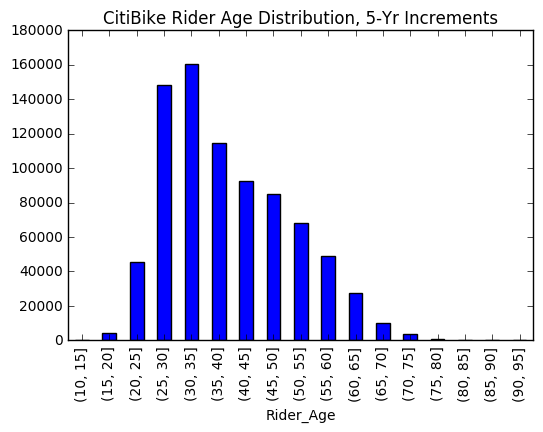

In [80]:
# Age Distribution Histogram

bins = np.arange(10, 99, 5)
axM = df_June15.Rider_Age.groupby(pd.cut(df_June15.Rider_Age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("CitiBike Rider Age Distribution, 5-Yr Increments")

In [81]:
age_Dist = df_June15['Rider_Age']  # Age Distribution

### Null Hypothesis (HO):  The data follows a normal / gaussian distribution
### Alternative Hypothesis (HA):  The data does not follow a normal / gaussian distribution
### Significance Level - 0.05

In [82]:
# KS Test - Normal Distribution

kstest_1 = scipy.stats.kstest(age_Dist,'norm')    
kstest_cv1 = 1.36 / np.sqrt(len(age_Dist))     # Critical Value = see notes at the bottom of this cell

if kstest_1[0] > kstest_cv1:
    print ('The KS test statistic is larger than the critical value, the Null Hypothesis is rejected')
else:
    print ('The KS test statistic is smaller than the critical value, the Null Hypothesis is not rejected')

# Critical Value @ 0.05 significance = 1.36 / Sample Size (810827)
# Source: http://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/




The KS test statistic is larger than the critical value, the Null Hypothesis is rejected


In [83]:
# Anderson Darling Test - Normal Distribution 
adtest_1 =  scipy.stats.anderson(age_Dist, dist='norm')

adtest_stat = adtest_1[0]    # Anderson Darling Test Statistic
adtest_cv1 = adtest_1[1][2]  # Anderson Darling Critical Value @ 0.05 significance

if adtest_stat > adtest_cv1:
    print ('The AD test statistic is larger than the critical value, the Null Hypothesis is rejected')
else:
    print ('The AD test statistic is smaller than the critical value, the Null Hypothesis is not rejected')




The AD test statistic is larger than the critical value, the Null Hypothesis is rejected


### Null Hypothesis (HO):  The data follows a logistic distribution
### Alternative Hypothesis (HA):  The data does not follow a logistic distribution
### Significance Level - 0.05

In [84]:
# KS Test - Logistic Distribution

kstest_2 = scipy.stats.kstest(age_Dist,'logistic')    
kstest_cv2 = 1.36 / np.sqrt(len(age_Dist))     # Critical Value = see notes at the bottom of this cell

if kstest_2[0] > kstest_cv2:
    print ('The KS test statistic is larger than the critical value, the Null Hypothesis is rejected')
else:
    print ('The KS test statistic is smaller than the critical value, the Null Hypothesis is not rejected')

# Critical Value @ 0.05 significance = 1.36 / Sample Size (810827)
# Source: http://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/





The KS test statistic is larger than the critical value, the Null Hypothesis is rejected


In [85]:
# Anderson Darling Test - Logistic Distribution 
adtest_2 =  scipy.stats.anderson(age_Dist, dist='logistic')

adtest_stat2 = adtest_2[0]    # Anderson Darling Test Statistic
adtest_cv2 = adtest_2[1][2]  # Anderson Darling Critical Value @ 0.05 significance

if adtest_stat2 > adtest_cv2:
    print ('The AD test statistic is larger than the critical value, the Null Hypothesis is rejected')
else:
    print ('The AD test statistic is smaller than the critical value, the Null Hypothesis is not rejected')


The AD test statistic is larger than the critical value, the Null Hypothesis is rejected


Mean age of Citibike Riders, June 2015:  39.7436197857


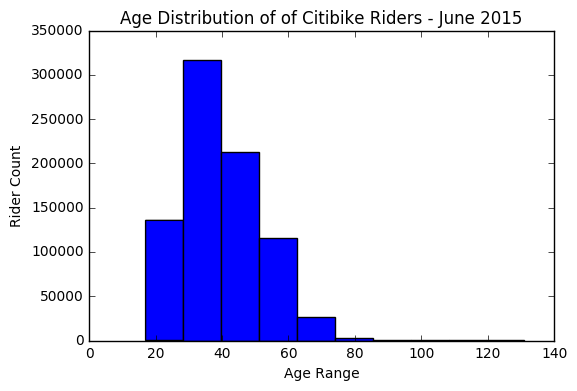

In [86]:
pl.hist(age_Dist)
pl.title('Age Distribution of of Citibike Riders - June 2015')
pl.xlabel('Age Range')
pl.ylabel('Rider Count')
print ('Mean age of Citibike Riders, June 2015: ', age_Dist.mean())

#### The mean age of the citibike rider distribution is approximately 39.7 years old.  In the histogram above, depicting counts of citibike riders by age cohort, we see the most riders in the 30 - 40 age group, which is to be expected given the mean of the distribution.  The above histogram is also consistent with the Central Limit Theorem, as the greatest concentration of riders fall in those age ranges closest to the mean (30 - 40 and 40 - 50 year olds), with declining concentrations the further from the mean one goes.